In [1]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import glob
import cv2
import os

from collections import defaultdict

%matplotlib inline

In [2]:
# Ideas for looking into a linux directory and getting files : GLOB
def read_image_files(image_path, conversion=cv2.COLOR_BGR2RGB, image_extensions = ['.JPG', '.JPEG', '.BMP', '.PNG']):
    image_files = glob.glob(os.path.join(image_path,'*'))
    image_files = [item for item in image_files if any([ext in item.upper() for ext in image_extensions])]        
    image_list = [(os.path.basename(f),cv2.imread(f,conversion)) for f in image_files]
    image_dict = {file:image for (file,image) in image_list}
    return image_dict

def generate_histogram(image_dict, number_bins=8):
    histogram_dict = dict()
    for filename in image_dict:
        image = image_dict[filename]        
        hist0 = cv2.calcHist([image], [0], None, [number_bins], [0, 256])
        hist1 = cv2.calcHist([image], [1], None, [number_bins], [0, 256])
        hist2 = cv2.calcHist([image], [2], None, [number_bins], [0, 256])
        overall_hist = np.concatenate([hist0,hist1,hist2]).ravel()
        
        hist = overall_hist / overall_hist.sum()
        histogram_dict[filename] = hist        
    return histogram_dict

In [3]:

image_path = '/Users/connors/Desktop/CV/HistogramDataset/'
class_list = ['bulbasaur','charmander','pikachu','squirtle']

# Process the target images
image_target_dict = read_image_files(os.path.join(image_path,'targets'))
hist_target_dict = generate_histogram(image_target_dict)

image_class_dict = dict()
hist_class_dict = dict()
for c in class_list:
    image_class_dict[c] = read_image_files(os.path.join(image_path,'classes',c))
    hist_class_dict [c] = generate_histogram(image_class_dict[c])
#print(image_class_dict)
# Process the test images

image_mystery_dict = read_image_files(os.path.join(image_path,'mystery'))
hist_mystery_dict = generate_histogram(image_mystery_dict)

In [4]:
OPENCV_METHODS = (
        ("Correlation", cv2.HISTCMP_CORREL, True),
        ("Chi-Squared", cv2.HISTCMP_CHISQR, False),
        ("Intersection", cv2.HISTCMP_INTERSECT, True,),
        ("Hellinger", cv2.HISTCMP_BHATTACHARYYA, False))

In [5]:
def compare_histogram(image_name, hist_base, histogram_dict):
    results_dict = dict()
    for (methodName, method, reverse) in OPENCV_METHODS: 

        results = {k : cv2.compareHist(hist_base, hist, method) for (k,hist) in sorted(histogram_dict.items())}
        #print(type(results))
        # sort the results
        results = sorted([(v, k) for (k, v) in results.items()], reverse = reverse)
        #print(type(results))

        results_dict[methodName] = results
        #print(results_dict[methodName][class_name[i]])
        #print (image_name,methodName,results)
        # show the query image
        #target_img = plt.imread(os.path.join(image_path,'targets//' + image_name))
        #plt.imshow(target_img)
        #plt.show()
        #i = i + 1
        
    return results_dict


In [6]:
#print(class_list)
#print(image_class_dict.keys())

In [7]:
# Setup a triple dictionation [class_name of a target][class_name][histogram_name]
target_class_compare_dict = defaultdict(dict)

for (image_name, hist_base) in hist_target_dict.items():
    #print(image_name)
    # convert to target name
    target_class = image_name.split('.')[0].split('_')[1]
    #print(target_class)
    
    for class_name in class_list:

        target_class_compare_dict[target_class][class_name] = compare_histogram(class_name, hist_target_dict[image_name], hist_class_dict[class_name])
        #print(target_class_compare_dict[target_class][class_name])
#print(target_class_compare_dict.keys())

In [8]:
# Patrick- This is an example, how to access the massive triple dictionary
print('Pikachu to Pikachu \n\n')
print ('Correlation:\n',target_class_compare_dict['pikachu']['pikachu']["Correlation"])
print ('Chi-Squared:\n',target_class_compare_dict['pikachu']['pikachu']["Chi-Squared"])
print ('Intersection:\n',target_class_compare_dict['pikachu']['pikachu']["Intersection"])
print ('Hellinger:\n',target_class_compare_dict['pikachu']['pikachu']["Hellinger"])



Pikachu to Pikachu 


Correlation:
 [(0.8578661145484695, '4.png'), (0.84162808425238, '5.png'), (0.44570073193045195, '8.png'), (0.23110706517289242, '1.png'), (0.2247963657183375, '3.png'), (0.13955487527445715, '2.png'), (0.1368973884684922, '10.png'), (0.10035062431161372, '9.png'), (0.003744007402371596, '6.png'), (-0.016282192773904566, '7.png')]
Chi-Squared:
 [(4.931336213403033, '4.png'), (5.417565339664923, '5.png'), (14.206473893927633, '8.png'), (118.99473069111978, '6.png'), (124.85376912042297, '9.png'), (127.46875617934086, '3.png'), (171.0141086702477, '1.png'), (205.53732572274455, '2.png'), (230.05023244406289, '10.png'), (263.53594529481586, '7.png')]
Intersection:
 [(0.7678928186151097, '4.png'), (0.7569464569105548, '5.png'), (0.4701646773610264, '8.png'), (0.3691336225019768, '9.png'), (0.36850067116029095, '1.png'), (0.3270427668094271, '3.png'), (0.31299965757534665, '10.png'), (0.30633111015777104, '2.png'), (0.1972729716799222, '6.png'), (0.1938923991547199, '7

In [9]:
# How to access outside class the target class
# Now if you see how to access, we would want to write some functions and then access data using a loop
# 
print (target_class_compare_dict['pikachu']['charmander']["Correlation"])
print (target_class_compare_dict['pikachu']['charmander']["Chi-Squared"])
print (target_class_compare_dict['pikachu']['charmander']["Intersection"])
print (target_class_compare_dict['pikachu']['charmander']["Hellinger"])

[(0.9233361035097941, '4.png'), (0.9182099753770028, '6.png'), (0.9074010318699526, '9.png'), (0.8990384083320152, '5.png'), (0.8820177233556487, '1.png'), (0.8617274420138767, '10.png'), (0.17433418002002243, '8.png'), (0.1534913869368874, '7.png'), (0.12887254668512735, '2.png'), (0.12243680613463355, '3.png')]
[(1.0084780099571788, '6.png'), (1.0108306015271324, '4.png'), (1.862788777358422, '5.png'), (2.367705681116729, '1.png'), (2.41277696293327, '9.png'), (2.7430021778522575, '10.png'), (113.23066554018328, '7.png'), (129.18748869806512, '8.png'), (156.85512784035433, '2.png'), (195.4748156690388, '3.png')]
[(0.8020134189282544, '9.png'), (0.7821569845837075, '4.png'), (0.7801320675935131, '6.png'), (0.7689800825974089, '5.png'), (0.7526945336139761, '1.png'), (0.7195509036391741, '10.png'), (0.34712126693921164, '7.png'), (0.32976978851365857, '8.png'), (0.30031326931202784, '2.png'), (0.26931393187260255, '3.png')]
[(0.2824365884144922, '4.png'), (0.297483589585894, '9.png'), 

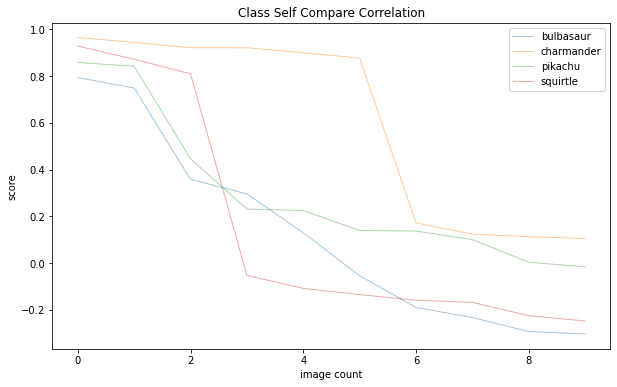

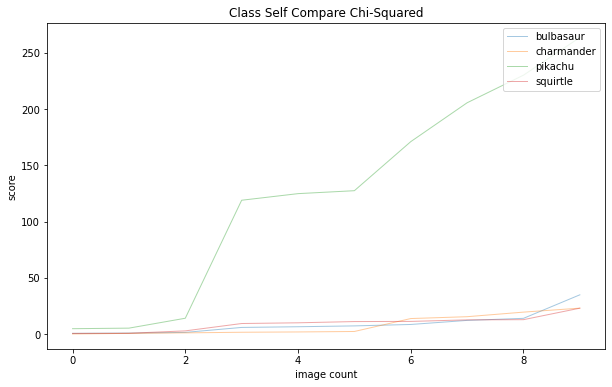

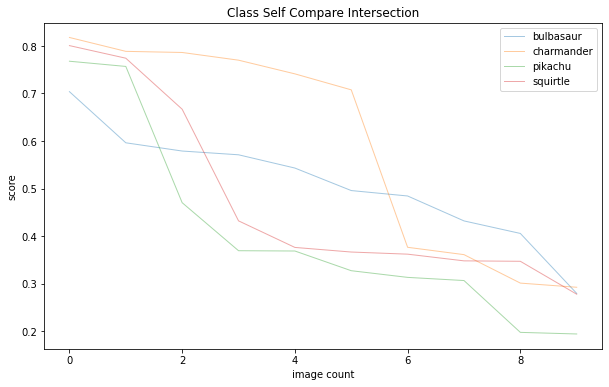

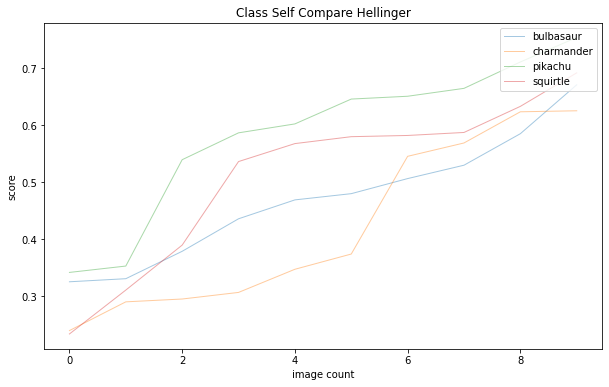

In [11]:

#This compares all of the targets with their own class, for each method.


for (methodName, method, reverse) in OPENCV_METHODS:
    plt.figure(figsize=(10, 6))

    for index, class_name in enumerate(class_list):
        comparison_list = [x for (x,y) in target_class_compare_dict[class_name][class_name][methodName]]
        plt.plot(comparison_list, marker='',linewidth=1, alpha=0.4) #label = x_axis_values)
    plt.legend(class_list, loc='upper right')
    plt.ylabel('score')
    plt.xlabel('image count')
    plt.title('Class Self Compare ' + methodName)
    plt.show()




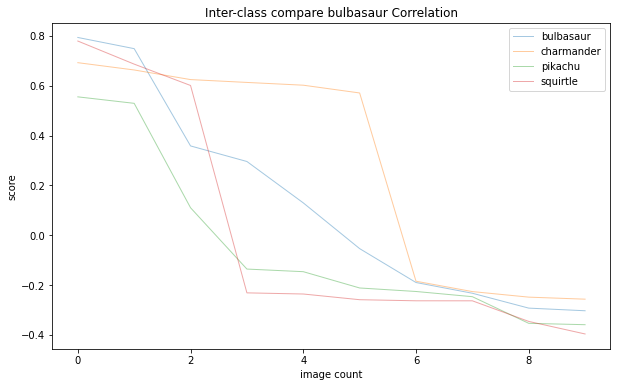

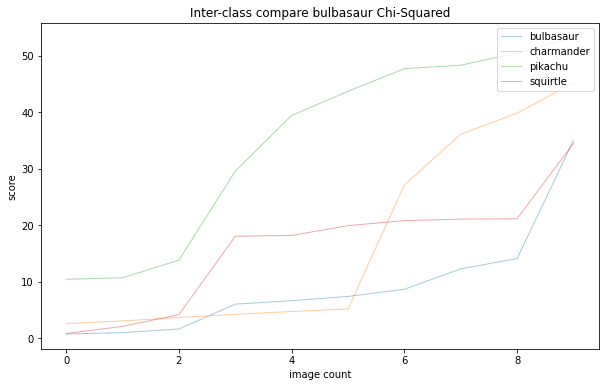

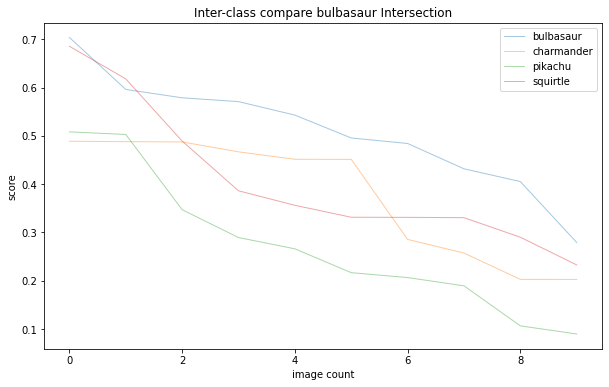

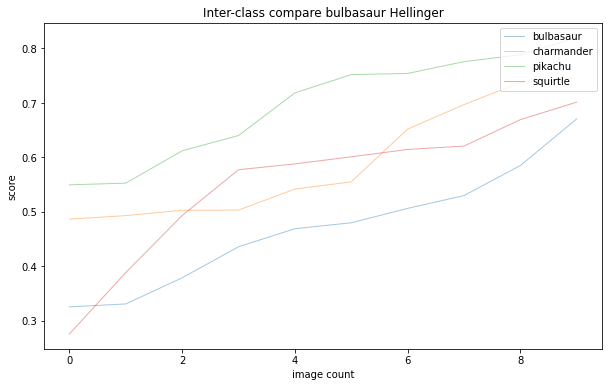

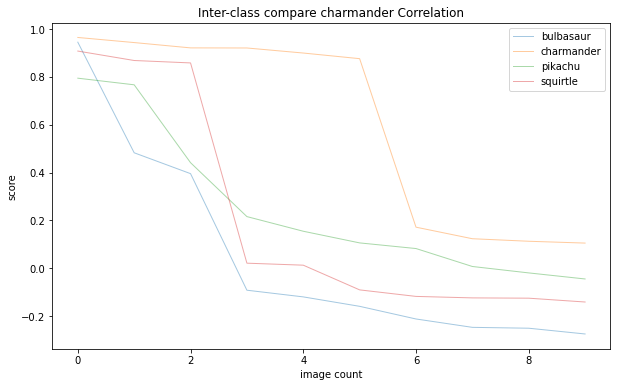

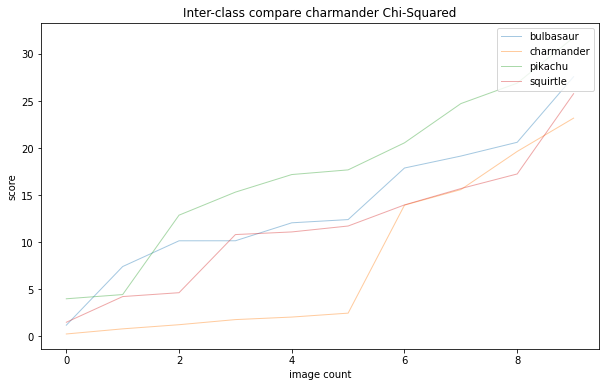

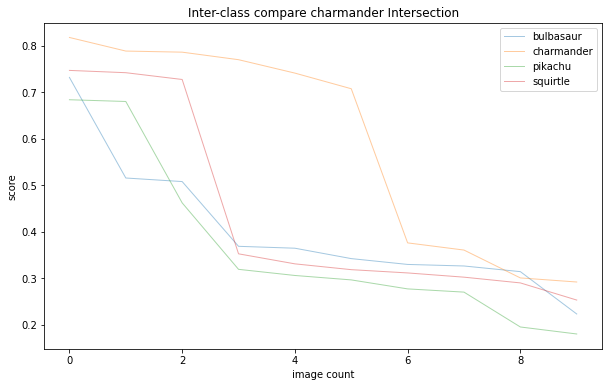

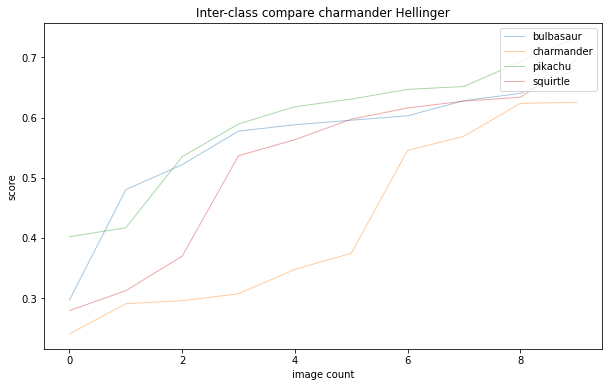

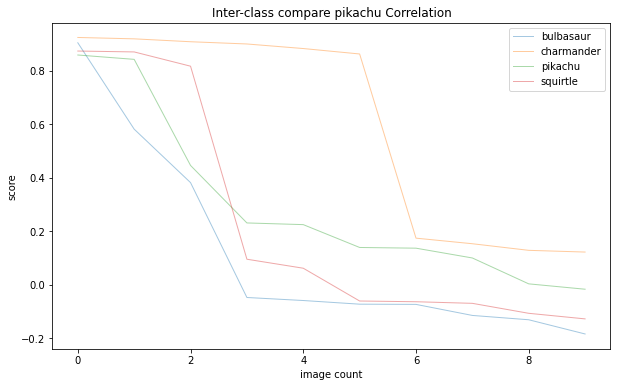

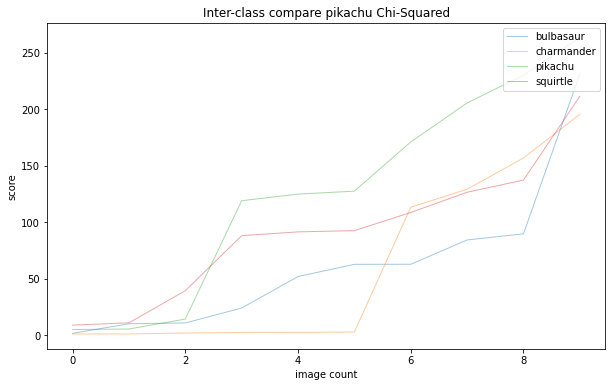

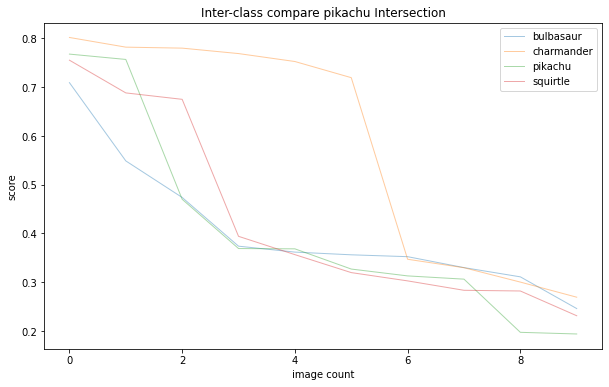

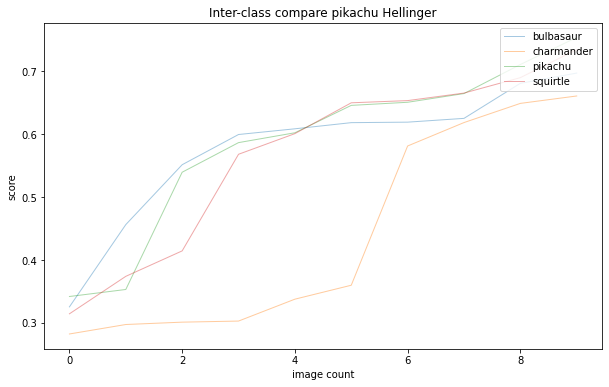

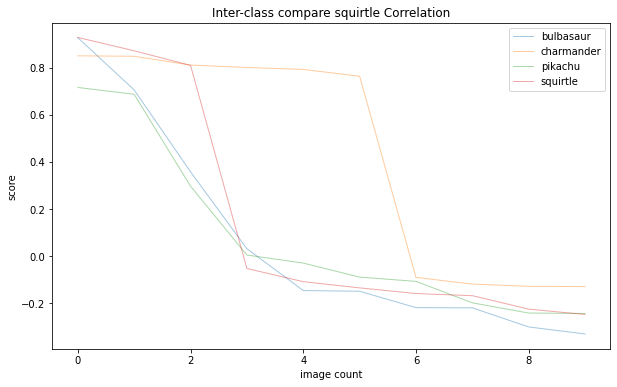

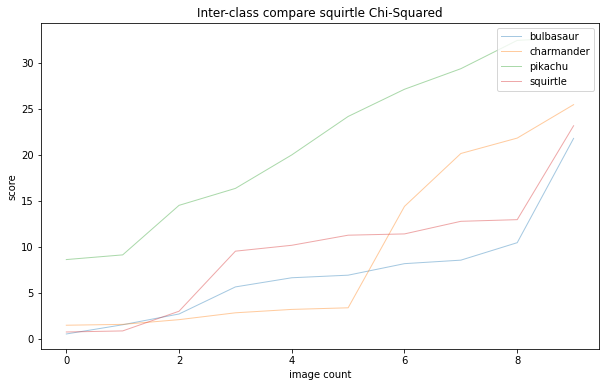

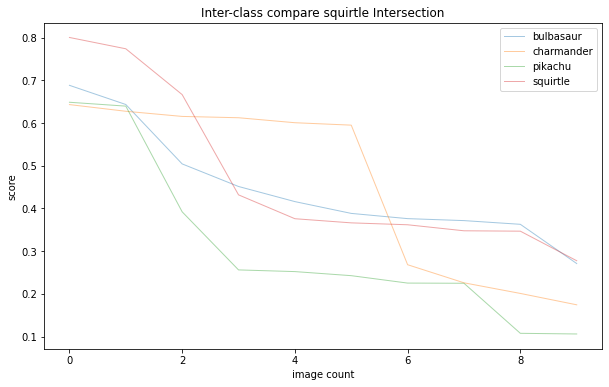

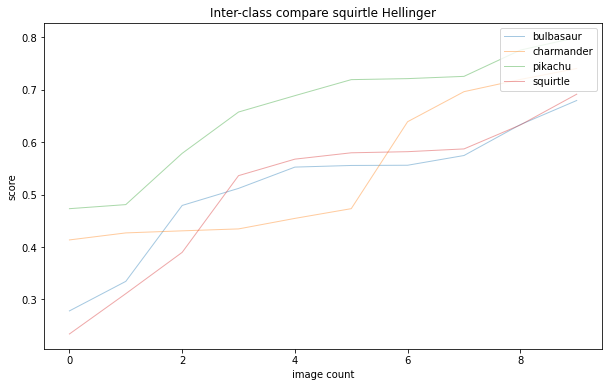

In [12]:
# Compare all of the classes

for class_index in class_list:
    for (methodName, method, reverse) in OPENCV_METHODS:
        plt.figure(figsize=(10, 6))

        for index, class_name in enumerate(class_list):
            comparison_list = [x for (x,y) in target_class_compare_dict[class_index][class_name][methodName]]
            plt.plot(comparison_list, marker='',linewidth=1, alpha=0.4) #label = x_axis_values)
        plt.legend(class_list, loc='upper right')
        plt.ylabel('score')
        plt.xlabel('image count')
        plt.title('Inter-class compare ' + class_index + ' '+ methodName)
        plt.show()



In [64]:
# Let's first find out the comparison of scores : AVGERAGE, MEDIAN, MAX, MIN


def calculate_score_range(histogram_scores_tuple):
    scores = [score for (score,filename) in histogram_scores_tuple]
    avg_score = sum(scores)/len(scores)
    median_score = scores[int(len(scores)/2)]   # Assume the scores are sorted 
    max_score = max(scores)
    min_score = min(scores)
    return (avg_score, median_score, max_score, min_score)


target_name = 'pikachu'
print (target_name)
for (methodName, method, reverse) in OPENCV_METHODS: 
    # Check the base class: target_name with itself
    print ( methodName)

    print (target_name, end="")
    print (calculate_score_range(target_class_compare_dict[target_name][target_name][methodName]))
    
    # Check the base class with every other class name (not itself)
    process_list = [class_name for class_name in class_list if class_name != target_name]
    
    for class_name in process_list:
        print (class_name, end="")
        print (calculate_score_range(target_class_compare_dict[target_name][class_name][methodName]))

    print ()
    
   

pikachu
Correlation
pikachu(0.2965363064305562, 0.13955487527445715, 0.8578661145484695, -0.016282192773904566)
bulbasaur(0.11880737855412024, -0.07208745153700014, 0.9035231960299952, -0.18330261235654657)
charmander(0.5970865604234961, 0.8617274420138767, 0.9233361035097941, 0.12243680613463355)
squirtle(0.2290611535880079, -0.06025418554882977, 0.8726629397456311, -0.12699154060127152)

Chi-Squared
pikachu(126.60102435697502, 127.46875617934086, 263.53594529481586, 4.931336213403033)
bulbasaur(62.873987079196255, 62.66979879006354, 231.1542099032823, 1.5640142784473547)
charmander(60.61536799583865, 2.7430021778522575, 195.4748156690388, 1.0084780099571788)
squirtle(91.48103488490081, 92.50404683040496, 211.49204689401796, 8.84678964098172)

Intersection
pikachu(0.40701771519261454, 0.3270427668094271, 0.7678928186151097, 0.1938923991547199)
bulbasaur(0.40635747091182567, 0.35625642689410597, 0.709323797840625, 0.2460120526375249)
charmander(0.5852046247593534, 0.7195509036391741, 0

In [13]:


# Process the target images
image_target_dict = read_image_files(os.path.join(image_path,'targets'))

bin_size_list = [8,16,32,64]

hist_target_bin_dict = defaultdict(dict)
for number_bins in bin_size_list:
    hist_target_bin_dict[number_bins] = generate_histogram(image_target_dict, number_bins=number_bins)

image_class_dict = dict()
hist_class_bin_dict = defaultdict(dict)

for c in class_list:
    image_class_dict[c] = read_image_files(os.path.join(image_path,'classes',c))
    for number_bins in bin_size_list:
        hist_class_bin_dict[number_bins][c] = generate_histogram(image_class_dict[c], number_bins=number_bins)
#print(image_class_dict)
# Process the test images

image_mystery_dict = read_image_files(os.path.join(image_path,'mystery'))
hist_mystery_bin_dict = defaultdict(dict)
for number_bins in bin_size_list:
    hist_mystery_bin_dict[number_bins] = generate_histogram(image_mystery_dict,number_bins=number_bins)


In [14]:
bin_target_class_compare_dict = dict()
for number_bins in bin_size_list:
    # Setup a triple dictionation [class_name of a target][class_name][histogram_name]
    target_class_compare_dict = defaultdict(dict)

    for (image_name, hist_base) in hist_target_dict.items():
        #print(image_name)
        # convert to target name
        target_class = image_name.split('.')[0].split('_')[1]
        #print(target_class)
    
        for class_name in class_list:

            target_class_compare_dict[target_class][class_name] = compare_histogram(class_name, hist_target_bin_dict[number_bins][image_name], hist_class_bin_dict[number_bins][class_name])
        #print(target_class_compare_dict[target_class][class_name])
#print(target_class_compare_dict.keys())
    bin_target_class_compare_dict[number_bins] = dict(target_class_compare_dict)

In [15]:

# this can be references for [bins][class][class][method]


print (bin_target_class_compare_dict[8]['pikachu']['pikachu']["Correlation"])
print (bin_target_class_compare_dict[16]['pikachu']['pikachu']["Correlation"])
print (bin_target_class_compare_dict[32]['pikachu']['pikachu']["Correlation"])
print (bin_target_class_compare_dict[64]['pikachu']['pikachu']["Correlation"])





[(0.8578661145484695, '4.png'), (0.84162808425238, '5.png'), (0.44570073193045195, '8.png'), (0.23110706517289242, '1.png'), (0.2247963657183375, '3.png'), (0.13955487527445715, '2.png'), (0.1368973884684922, '10.png'), (0.10035062431161372, '9.png'), (0.003744007402371596, '6.png'), (-0.016282192773904566, '7.png')]
[(0.8555801225887448, '4.png'), (0.7622593368852367, '5.png'), (0.3720817154549904, '8.png'), (0.2839319976727318, '3.png'), (0.17078270140011279, '2.png'), (0.11897758810840144, '9.png'), (0.11752282884444698, '1.png'), (0.04391694419711058, '6.png'), (0.03865123017765217, '10.png'), (0.021858088904550793, '7.png')]
[(0.8731428618040079, '4.png'), (0.7621891993371737, '5.png'), (0.42999189095108425, '8.png'), (0.29098107133401935, '3.png'), (0.16027236373524292, '2.png'), (0.09472554352110608, '1.png'), (0.09072410311545866, '9.png'), (0.06480610938215169, '6.png'), (0.03722994309745362, '7.png'), (0.03573202075728756, '10.png')]
[(0.8087565551598296, '4.png'), (0.7815745

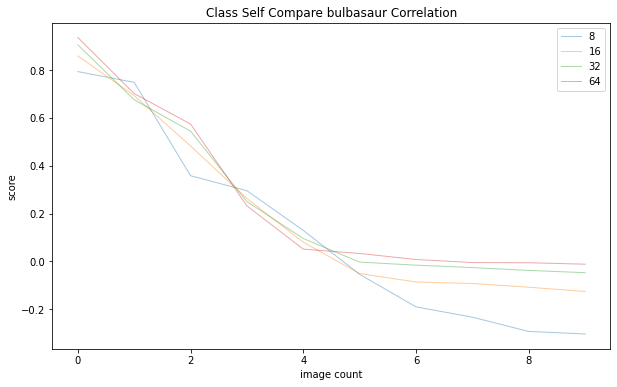

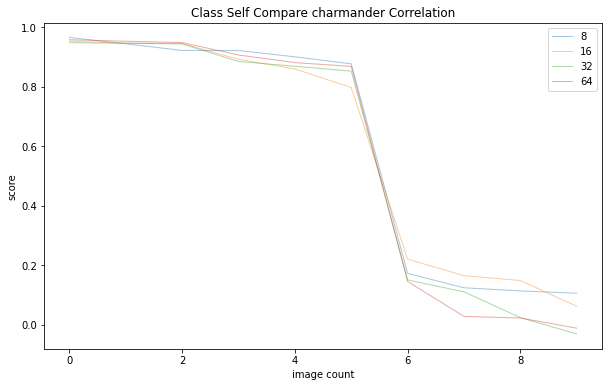

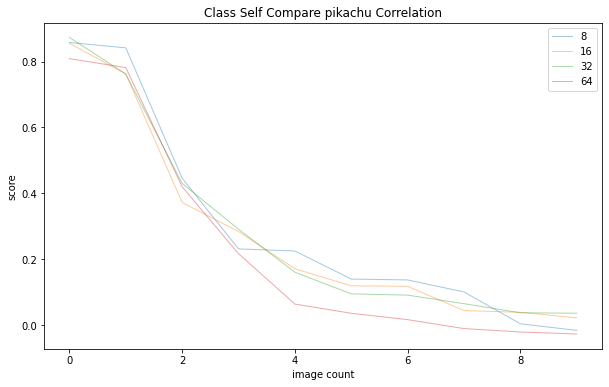

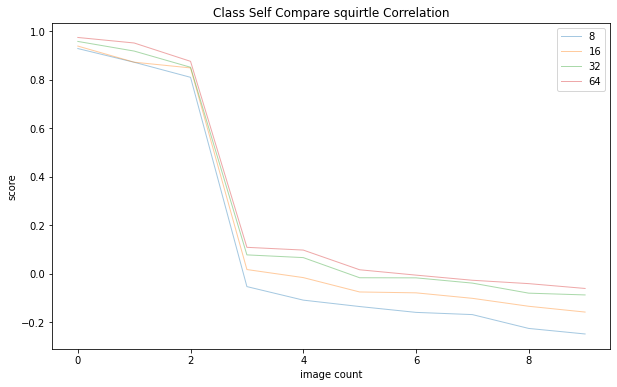

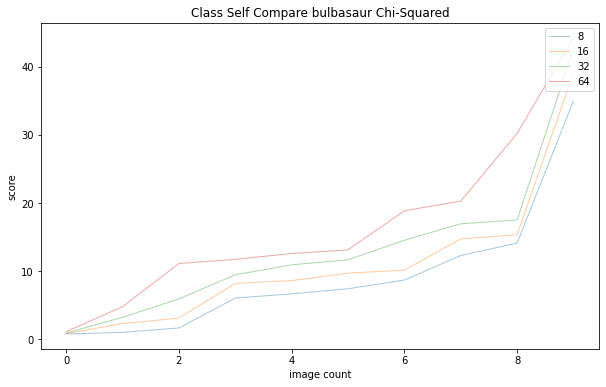

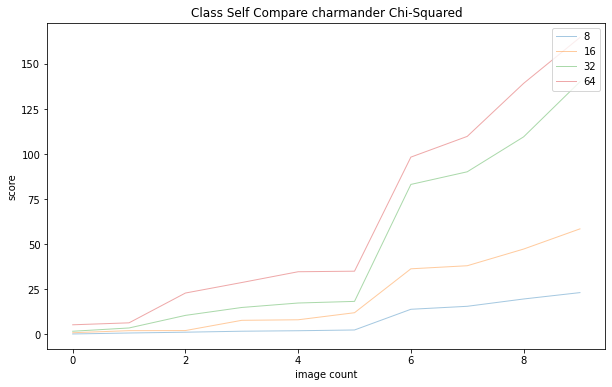

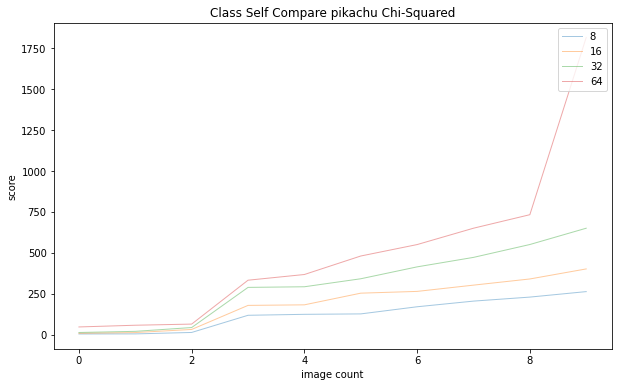

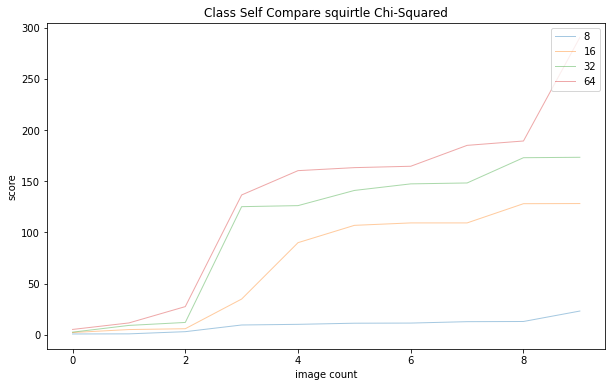

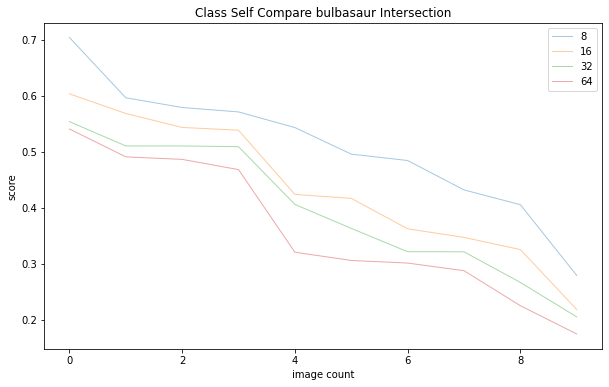

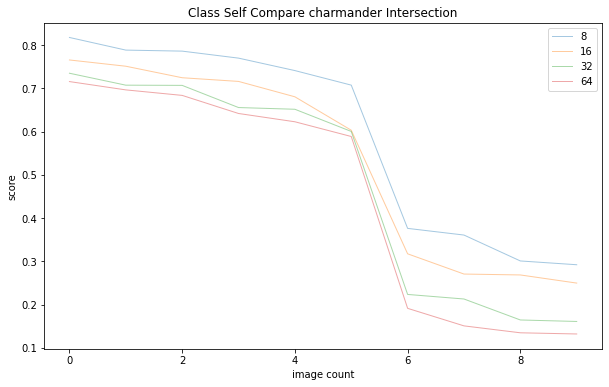

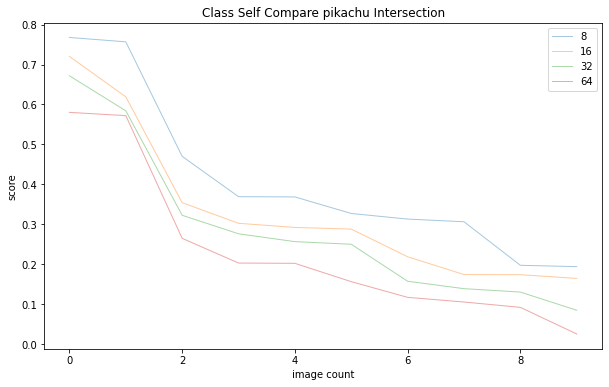

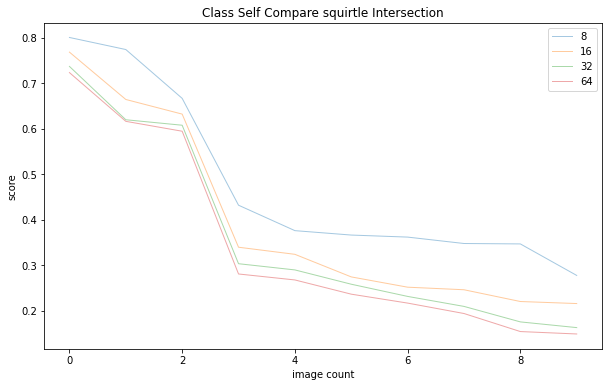

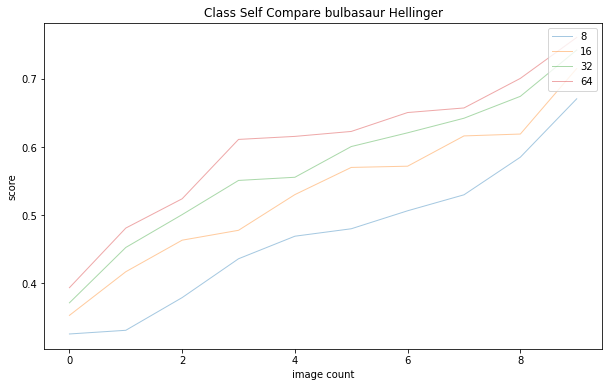

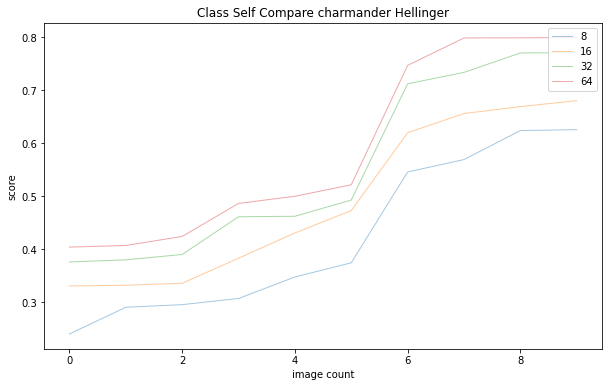

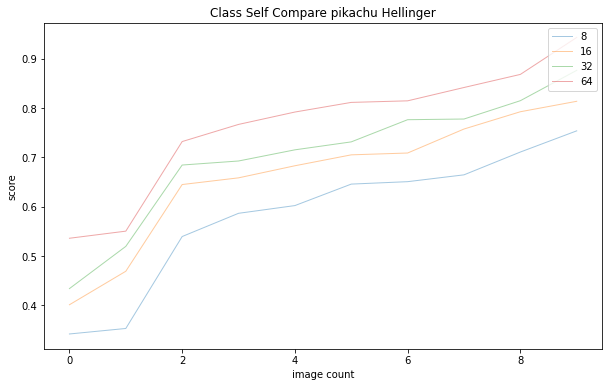

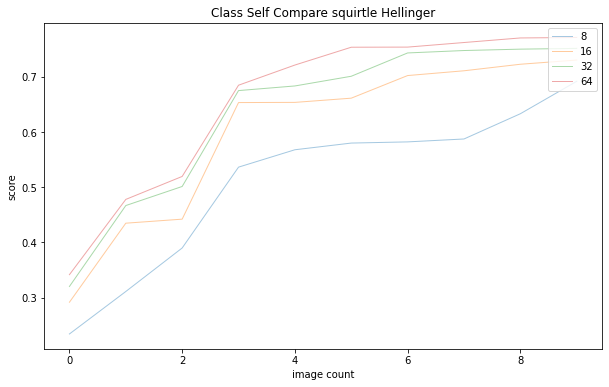

In [16]:
for (methodName, method, reverse) in OPENCV_METHODS:

    
    for index, class_name in enumerate(class_list):
        plt.figure(figsize=(10, 6))


        for number_bins in bin_size_list:
            comparison_list = [x for (x,y) in bin_target_class_compare_dict[number_bins][class_name][class_name][methodName]]
            plt.plot(comparison_list, marker='',linewidth=1, alpha=0.4) #label = x_axis_values)
        plt.legend([str(x) for x in bin_size_list], loc='upper right')
        plt.ylabel('score')
        plt.xlabel('image count')
        plt.title('Class Self Compare ' + class_name + ' ' + methodName)
        plt.show()

